# IMPORTING MODULES

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import pickle

### DataSet Importing

In [3]:
DataSet = pd.read_csv('letter-recognition.data',header=None)
DataSet

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Column Name Changes

In [4]:
oldColumn = np.arange(17)
newColumn = ["Letter","X-Box","Y-Box","Width","Height","OnPix","X-Bar","Y-Bar","X2Bar","Y2Bar","XYBar","X2YBar","XY2Bar","X-Edge","X-Edge-Y","Y-Edge","Y-Edge-X"]
Columns = dict(zip(oldColumn,newColumn))

DataSet.rename(columns=Columns,inplace=True)
DataSet

,Letter,X-Box,Y-Box,Width,Height,OnPix,X-Bar,Y-Bar,X2Bar,Y2Bar,XYBar,X2YBar,XY2Bar,X-Edge,X-Edge-Y,Y-Edge,Y-Edge-X
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# Outlier Detection

In [5]:
for i in newColumn[1:]:
    Q1 = DataSet[i].sort_values().quantile(0.25)
    Q3 = DataSet[i].sort_values().quantile(0.75)
    IQR = Q3-Q1
    LF = Q1 - 1.5*IQR
    RF = Q3 + 1.5*IQR
    print("Column - {} | has max : {} min : {} |  LF : {}  RF : {}".format(i,DataSet[i].max(),DataSet[i].min(),LF,RF))
    valid = np.array([])
    DataSet = DataSet[DataSet[i] > LF]
    DataSet = DataSet[DataSet[i] < RF]

Column - X-Box | has max : 15 min : 0 |  LF : 0.0  RF : 8.0
Column - Y-Box | has max : 15 min : 0 |  LF : -1.0  RF : 15.0
Column - Width | has max : 12 min : 0 |  LF : 1.0  RF : 9.0
Column - Height | has max : 15 min : 0 |  LF : -0.5  RF : 11.5
Column - OnPix | has max : 13 min : 0 |  LF : -1.0  RF : 7.0
Column - X-Bar | has max : 15 min : 0 |  LF : 3.0  RF : 11.0
Column - Y-Bar | has max : 15 min : 0 |  LF : 4.0  RF : 12.0
Column - X2Bar | has max : 15 min : 0 |  LF : -1.5  RF : 10.5
Column - Y2Bar | has max : 15 min : 0 |  LF : -0.5  RF : 11.5
Column - XYBar | has max : 15 min : 2 |  LF : 2.5  RF : 14.5
Column - X2YBar | has max : 14 min : 0 |  LF : 0.5  RF : 12.5
Column - XY2Bar | has max : 15 min : 1 |  LF : 4.0  RF : 12.0
Column - X-Edge | has max : 11 min : 0 |  LF : -1.0  RF : 7.0
Column - X-Edge-Y | has max : 14 min : 3 |  LF : 6.5  RF : 10.5
Column - Y-Edge | has max : 13 min : 0 |  LF : -1.5  RF : 10.5
Column - Y-Edge-X | has max : 13 min : 1 |  LF : 4.0  RF : 12.0


# Splitting DataSets

In [6]:
X = DataSet.drop('Letter',axis=1)
Y = DataSet['Letter']

    -> Model Folder Creation

In [7]:
ModelFolder = "Models"
try:
    os.mkdir(ModelFolder)
except:
    pass



Model - 5 Training Is Complete with score 0.9634922697154735
Model - 7 Training Is Complete with score 0.9582954397817331
Model - 9 Training Is Complete with score 0.9489411459010004
[5, 7, 9] [0.9634922697154735, 0.9582954397817331, 0.9489411459010004]


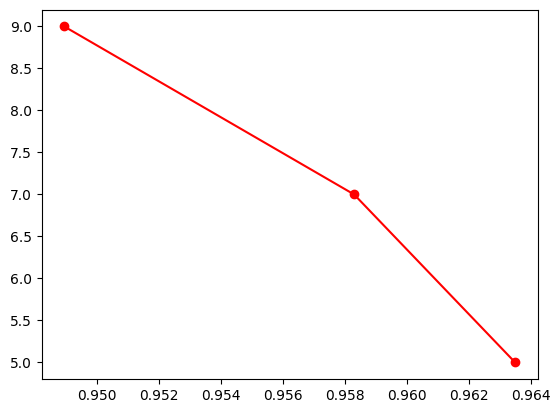

In [13]:
Score = []
Model = []
for i in range(5,10,2):
    model = KNeighborsClassifier(n_neighbors=i)
    X_train,X_test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.1)
    model.fit(X_train,Y_Train)
    score = model.score(X_train,Y_Train)
    file = open("{}/Model{}.pkl".format(ModelFolder,i),'wb')
    pickle.dump(model,file)
    file.close()
    Score.append(score)
    Model.append(i)
    print("Model - {} Training Is Complete with score {}".format(i,score))
print(Model,Score)
plt.plot(Score,Model,'ro-')

# Best Model Package

In [14]:
import pickle

In [15]:
file = open("{}/Model{}.pkl".format(ModelFolder,Model[Score.index(max(Score))]),'rb')
model = pickle.load(file)
dataPackage = [model,Model[Score.index(max(Score))],max(Score)*100,newColumn]
file.close()
file = open("BestModel.pkl",'wb')
pickle.dump(dataPackage,file)
file.close()
